
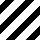
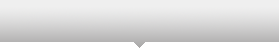
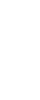
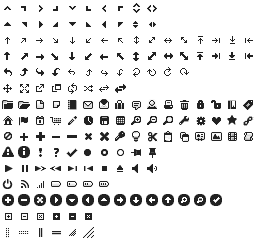
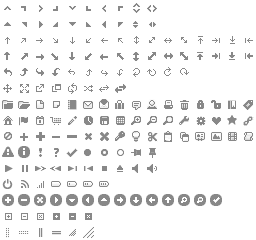
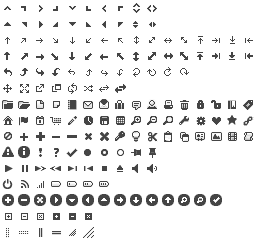
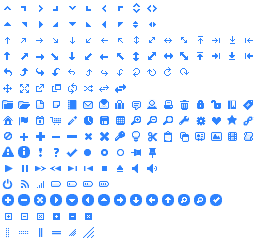
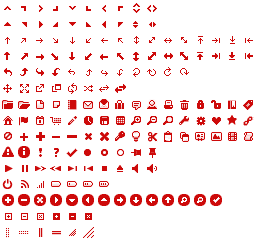
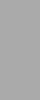
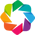
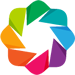
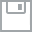
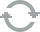
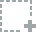
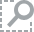
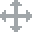
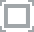
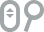

In [1]:
%matplotlib inline
# data manipulation and modeling
import numpy as np
import pandas as pd
import statsmodels.api as sm

# graphix
import matplotlib.pyplot as plt
import prettyplotlib as pplt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsaplots

from bokeh.plotting import figure,gridplot,show,output_notebook
from bokeh.models import Range1d
output_notebook()

# utility
import os

# notebook parameters
pd.set_option('display.max_columns', 40) # number of columns in training set
plt.rcParams['figure.figsize'] = (25.0, 25.0)

In [2]:
training_data = pd.read_csv("TrainingSet.csv", index_col=0)
submission_labels = pd.read_csv("SubmissionRows.csv", index_col=0)

In [3]:
training_data.head(100)

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
0              NaN            NaN            NaN            NaN   
1              NaN            NaN            NaN            NaN   
2              NaN            NaN            NaN            NaN   
4              NaN            NaN            NaN            NaN   
5              NaN            NaN            NaN            NaN   
6              NaN            NaN            NaN            NaN   
8              NaN            NaN            NaN            NaN   
9              NaN            NaN            NaN            NaN   
10             NaN            NaN            NaN            NaN   
11             NaN            NaN            NaN            NaN   
12             NaN            NaN            NaN            NaN   
13             NaN            NaN            NaN            NaN   
16             NaN            NaN   2.670070e-01            NaN   
17             NaN            NaN   8.500150e+00            NaN   
18             NaN            NaN   4.402852e+01            NaN   
20             NaN            NaN            NaN            NaN   
21             NaN            NaN            NaN            NaN   
23             NaN            NaN            NaN            NaN   
24             NaN            NaN            NaN            NaN   
29    1.383995e-01   1.455553e-01   1.511521e-01   1.690770e-01   
30    2.257446e+06   2.577942e+06   3.328705e+06   4.087907e+06   
31             NaN            NaN            NaN            NaN   
32             NaN            NaN            NaN            NaN   
33    1.029650e+00   1.302140e+00   1.516893e+00   1.153010e+00   
34    1.679471e+07   2.306232e+07   3.340536e+07   2.787722e+07   
35    1.369047e+00   1.498578e+00   2.999907e+00   2.846491e+00   
36    2.233065e+07   2.654146e+07   6.606462e+07   6.882184e+07   
38    0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
39    0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
40    3.596662e+00   3.687096e+00   5.196704e+00   5.700156e+00   
..             ...            ...            ...            ...   
89             NaN            NaN            NaN            NaN   
90             NaN            NaN            NaN            NaN   
91             NaN            NaN            NaN            NaN   
92             NaN            NaN            NaN            NaN   
93             NaN            NaN            NaN            NaN   
94             NaN            NaN            NaN            NaN   
95             NaN            NaN            NaN            NaN   
96             NaN            NaN            NaN            NaN   
97             NaN            NaN            NaN            NaN   
98             NaN            NaN            NaN            NaN   
99    3.270000e+02            NaN            NaN            NaN   
102            NaN            NaN            NaN            NaN   
104            NaN            NaN            NaN            NaN   
109   5.280000e+01   5.263200e+01   5.246300e+01   5.229800e+01   
110            NaN            NaN            NaN            NaN   
115   1.835376e+01   1.818398e+01   1.659227e+01   1.699455e+01   
116   1.317800e+10   1.418350e+10   1.609450e+10   1.809920e+10   
117   1.393740e+01   7.630141e+00   1.347340e+01   1.245581e+01   
118   3.602481e+00   2.496938e+00   1.775350e+00   1.851251e+00   
120            NaN            NaN            NaN            NaN   
121            NaN            NaN            NaN            NaN   
122            NaN            NaN            NaN            NaN   
123            NaN            NaN            NaN            NaN   
124   1.532806e+03   1.639149e+03   1.917841e+03   2.126860e+03   
125   1.316349e-01   1.369798e-01   1.562576e-01   1.694467e-01   
128   1.961722e+01   2.035794e+01   2.084130e+01   2.241379e+01   
129   3.006940e+02   3.336970e+02   3.997030e+02   4.767100e+02   
130   4.090909e+01   4.295302e+01   4.015296e+01   4

In [4]:
submission_labels.head()

2008 [YR2008]  2012 [YR2012]
559             NaN            NaN
618             NaN            NaN
753             NaN            NaN
1030            NaN            NaN
1896            NaN            NaN

Submission labels are simpler. First observation is we want to predict 2008 and 2012 (and not the years in between). Second observation is that the index values indentify specific rows in the training set. E.g., we want to predict the row in the training set that has the ID 559. Just to look that up:

In [5]:
training_data.loc[559]

1972 [YR1972]                                    NaN
1973 [YR1973]                                    NaN
1974 [YR1974]                                    NaN
1975 [YR1975]                                    NaN
1976 [YR1976]                                    NaN
1977 [YR1977]                                    NaN
1978 [YR1978]                                    NaN
1979 [YR1979]                                    NaN
1980 [YR1980]                                    NaN
1981 [YR1981]                                    NaN
1982 [YR1982]                                    NaN
1983 [YR1983]                                    NaN
1984 [YR1984]                                    NaN
1985 [YR1985]                                    NaN
1986 [YR1986]                                    NaN
1987 [YR1987]                                    NaN
1988 [YR1988]                                    NaN
1989 [YR1989]                                    NaN
1990 [YR1990]                                 

make it easier to grab any column that we want.

In [5]:
def generate_year_list(start, stop=None):
    """ 
    make a list of column names for specific years
    in the format they appear in the data frame start/stop inclusive
    """

    if isinstance(start, list):
        data_range = start
    elif stop:
        data_range = range(start, stop+1)
    else:
        data_range = [start]
    
    yrs = []
    
    for yr in data_range:
        yrs.append("{0} [YR{0}]".format(yr))
        
    return yrs

# ========== TEST CASES =======
# one year
print generate_year_list(2008)

# start and stop (inclusive)
print generate_year_list(1985, 1990)

# custom year list
print generate_year_list([1985, 1990])

['2008 [YR2008]']
['1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]', '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]']
['1985 [YR1985]', '1990 [YR1990]']


In [62]:
prediction_rows = training_data.loc[submission_labels.index]

In [64]:
#prediction_rows

In [65]:
prediction_rows = prediction_rows[generate_year_list(1972, 2007)]
prediction_rows

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
559               NaN            NaN            NaN            NaN   
618               NaN            NaN            NaN            NaN   
753          0.296000       0.290900       0.285200       0.279800   
1030              NaN            NaN            NaN            NaN   
1896              NaN            NaN            NaN            NaN   
1955              NaN            NaN            NaN            NaN   
2090              NaN            NaN            NaN            NaN   
2690              NaN       0.676752       0.717112       0.740751   
3233              NaN            NaN            NaN            NaN   
3292              NaN            NaN            NaN            NaN   
3427         0.230900       0.227200       0.221900       0.215100   
5966              NaN            NaN            NaN            NaN   
6101              NaN            NaN            NaN            NaN   
7244              NaN            NaN            NaN            NaN   
7303              NaN            NaN            NaN            NaN   
7438              NaN            NaN            NaN            NaN   
7715              NaN            NaN            NaN            NaN   
8038              NaN            NaN            NaN            NaN   
8581              NaN            NaN            NaN            NaN   
8640              NaN            NaN            NaN            NaN   
8775              NaN            NaN            NaN            NaN   
9918              NaN            NaN            NaN            NaN   
9977              NaN            NaN            NaN            NaN   
10112        0.070100       0.068400       0.066100       0.063200   
10389             NaN            NaN            NaN            NaN   
11255             NaN            NaN            NaN            NaN   
11314             NaN            NaN            NaN            NaN   
11449             NaN            NaN            NaN            NaN   
11726             NaN            NaN            NaN            NaN   
12592             NaN            NaN            NaN            NaN   
...               ...            ...            ...            ...   
275115            NaN            NaN            NaN            NaN   
275981            NaN            NaN            NaN            NaN   
276040            NaN            NaN            NaN            NaN   
276175       0.098300       0.093900       0.090000       0.086500   
276775       0.792349       0.782280       0.763800       0.769398   
277377            NaN            NaN            NaN            NaN   
277512       0.058900       0.057000       0.055200       0.053400   
277789            NaN            NaN            NaN            NaN   
278655            NaN            NaN            NaN            NaN   
278714            NaN            NaN            NaN            NaN   
278849       0.080900       0.079100       0.077500       0.075800   
279126            NaN            NaN            NaN            NaN   
280051            NaN            NaN            NaN            NaN   
280786            NaN            NaN            NaN            NaN   
281329            NaN            NaN            NaN            NaN   
281388            NaN            NaN            NaN            NaN   
281523            NaN            NaN            NaN       0.107400   
282666            NaN            NaN            NaN            NaN   
282725            NaN            NaN            NaN            NaN   
282860       0.299300       0.288700       0.277900       0.266900   
283137            NaN            NaN            NaN            NaN   
283460       0.805803            NaN            NaN            NaN   
284003            NaN            NaN            NaN            NaN   
284062            NaN            NaN            NaN            NaN   
284197       0.170000       0.165100       0.161000       0.157900   
284474            

In [10]:
#prediction_rows.info()

In [12]:
# p1 = figure(title='Title',plot_width=800, plot_height=800)
# p1.line(generate_year_list(2000, 2007),training_data.loc[737],alpha=.4, line_width=4)
# show(p1)
#country, descrip = training_data[["Country Name", "Series Name"]].loc[r]

#p2 = figure(title="{} - {}".format(country, descrip),plot_width=500, plot_height=200,title_text_font_size='6pt')
#p2 = figure(title="Try",plot_width=500, plot_height=200,title_text_font_size='6pt')
#p2.line(generate_year_list(1972, 2007),training_data[100:101,:],alpha=.4, line_width=2)
#p2.scatter(generate_year_list(2000, 2007),training_data.loc[737], alpha=0.4,)
#show(p2)

In [ ]:
np.random.seed(10)
rand_rows = np.random.choice(prediction_rows.index.values, size=10)

def plot_rows(data, ids=None):
#     bmap = pplt.brewer2mpl.get_map('Set3','Qualitative', 10)
#     colors = bmap.mpl_colors
    
    if not None == ids:
        get_rows = lambda: enumerate(ids)
    else:
        get_rows = lambda: enumerate(data.index.values)
    
    for i,r in get_rows():
        time_data = data.loc[r]

        just_years = [y[:4] for y in data.columns]
        X = pd.DatetimeIndex(just_years)
        country, descrip = training_data[["Country Name", "Series Name"]].loc[r]

        p = figure(title="{} - {}".format(country, descrip),plot_width=500, plot_height=200,title_text_font_size='6pt')
        p.line(X, time_data,alpha=.4, line_width=2)
        p.scatter(X, time_data, alpha=0.4,)
        show(p)
plot_rows(prediction_rows, ids=rand_rows)


In [ ]:
# grab a random sample of 10 of the timeseries
np.random.seed(100)
rand_rows = np.random.choice(prediction_rows.index.values, size=1000)

def plot_rows(data, ids=None, linestyle="-", legend=True):
    # get some colors for the lines
    bmap = pplt.brewer2mpl.get_map('Set3','Qualitative', 10, True)
    #colors = bmap.mpl_colors
    
    if not None == ids:
        get_rows = lambda: enumerate(ids)
    else:
        get_rows = lambda: enumerate(data.index.values)
    
    for i, r in get_rows():
        # get the time series values
        time_data = data.loc[r]

        # create an x axis to plot along
        just_years = [y[:4] for y in data.columns]
        X = pd.DatetimeIndex(just_years)

        # get time series info for labeling
        country, descrip = training_data[["Country Name", "Series Name"]].loc[r]

        # plot the series
        plt.plot(X, time_data, 
                 label="{} - {}".format(country, descrip), ls=linestyle)
        plt.scatter(X, time_data, alpha=0.8)

#     if legend:
#         plt.legend(loc=0)
    plt.title("Progress Towards Subset of MDGs")

plot_rows(prediction_rows, ids=rand_rows)
plt.show()

In [10]:
country_data = training_data[training_data["Country Name"] == 'India']
country_values = country_data[generate_year_list(1972, 2007)].values

In [66]:
# country_data

In [64]:
# country_values

In [73]:
#country_data.info()

In [11]:
countrydata = training_data.groupby("Country Name")

In [54]:
india = countrydata.get_group("India")
india

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
114990            NaN            NaN            NaN            NaN   
114991            NaN            NaN            NaN            NaN   
114992            NaN            NaN            NaN            NaN   
114993            NaN            NaN            NaN            NaN   
114994            NaN            NaN            NaN            NaN   
114995            NaN            NaN            NaN            NaN   
114996            NaN            NaN            NaN            NaN   
114998            NaN            NaN            NaN            NaN   
114999            NaN            NaN            NaN            NaN   
115000            NaN            NaN            NaN            NaN   
115001  -6.697895e-01   2.313600e+00  -1.531138e+00   6.592208e+00   
115002   1.396280e+11   1.428590e+11   1.406710e+11   1.499450e+11   
115003   6.563329e+10   7.828323e+10   9.029951e+10   8.772904e+10   
115004  -2.892019e+00   7.264818e-03  -3.767668e+00   4.154560e+00   
115005   2.404070e+02   2.404245e+02   2.313661e+02   2.409783e+02   
115006   1.130052e+02   1.317471e+02   1.485183e+02   1.409908e+02   
115007            NaN            NaN            NaN   7.396319e+00   
115008            NaN            NaN            NaN   7.389280e+09   
115009            NaN            NaN            NaN            NaN   
115010            NaN            NaN            NaN            NaN   
115011   4.436005e-01   4.074197e-01   3.990409e-01   4.852030e-01   
115012   3.208382e+08   3.528321e+08   4.026587e+08   4.847412e+08   
115013   7.216497e+00   6.914325e+00   7.479669e+00   8.051765e+00   
115014   5.219399e+09   5.987917e+09   7.547481e+09   8.044102e+09   
115015   2.410000e+00   2.418340e+00   2.561091e+00   2.209960e+00   
115016   1.743055e+09   2.094322e+09   2.584310e+09   2.207857e+09   
115017   2.103407e-01   2.453361e-01   6.697881e-01   1.119286e+00   
115018   1.521309e+08   2.124651e+08   6.758606e+08   1.118221e+09   
115019            NaN            NaN            NaN   1.785896e+01   
115020   1.366612e-01   1.174164e-01   1.478037e-01   2.041325e-01   
...               ...            ...            ...            ...   
116278            NaN            NaN            NaN            NaN   
116279            NaN            NaN            NaN            NaN   
116280            NaN            NaN            NaN            NaN   
116281            NaN            NaN            NaN            NaN   
116282            NaN            NaN            NaN            NaN   
116283            NaN            NaN            NaN            NaN   
116284            NaN            NaN            NaN            NaN   
116285            NaN            NaN            NaN            NaN   
116286            NaN            NaN            NaN            NaN   
116287   1.184179e+08   1.230170e+08   1.277875e+08   1.327346e+08   
116288   2.038880e+01   2.070320e+01   2.101760e+01   2.133200e+01   
116289   3.816655e+00   3.810233e+00   3.804689e+00   3.798258e+00   
116290   0.000000e+00   7.479700e+07   6.085150e+08   8.175230e+08   
116292            NaN            NaN            NaN            NaN   
116294            NaN            NaN            NaN            NaN   
116295            NaN            NaN            NaN            NaN   
116296            NaN            NaN            NaN            NaN   
116297            NaN            NaN            NaN            NaN   
116298            NaN            NaN            NaN            NaN   
116299            NaN            NaN            NaN            NaN   
116300            NaN            NaN            NaN            NaN   
116301            NaN            NaN            NaN            NaN   
116310            NaN            NaN            NaN            NaN   
116311   6.458208e+00   7.518547e+00   9.666839e+00   1.004536e+01   
116313            NaN            NaN            NaN            NaN   
116314            

In [13]:
india_values = india[generate_year_list(1972, 2007)].values

In [116]:
#india[generate_year_list(1972, 2007)]

In [30]:
# i2_notnull = india[india.columns[:36]].fillna(method = 'bfill', axis = 1)
# i2_notnull

In [31]:
# i2_notnull=i2_notnull[i2_notnull.columns[:36]].fillna(method = 'ffill', axis = 1)
# i2_notnull

In [ ]:
# normalized_data = StandardScaler().fit_transform(data.astype(float))

In [212]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [171]:
# figure(figsize = (10,7))
# ts = pd.Series(i3_notnull.loc[115001], index=pd.date_range(start = '1972', end = '2007'))
# ts = ts.cumsum()
# ts.plot()

In [32]:
# india1 = countrydata.get_group("India")

In [34]:
# india1 = india1[india1.columns[:36]].fillna(method = 'bfill', axis = 1)
# india1

In [35]:
# india1 = india1[india1.columns[:36]].fillna(method = 'ffill', axis = 1)
# india1

In [121]:
india2 = countrydata.get_group("India")

In [122]:
india2[india2.columns[:36]] = india2[india2.columns[:36]].fillna(method = 'bfill', axis = 1)
india2

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
114990   1.072211e+01   1.072211e+01   1.072211e+01   1.072211e+01   
114991   3.998927e+01   3.998927e+01   3.998927e+01   3.998927e+01   
114992   2.840343e+01   2.840343e+01   2.840343e+01   2.840343e+01   
114993   3.995493e+00   3.995493e+00   3.995493e+00   3.995493e+00   
114994   1.466854e+01   1.466854e+01   1.466854e+01   1.466854e+01   
114995   1.560154e+01   1.560154e+01   1.560154e+01   1.560154e+01   
114996   6.860000e+01   6.860000e+01   6.860000e+01   6.860000e+01   
114998   7.824938e-01   7.824938e-01   7.824938e-01   7.824938e-01   
114999   6.611141e+01   6.611141e+01   6.611141e+01   6.611141e+01   
115000   8.952264e+01   8.952264e+01   8.952264e+01   8.952264e+01   
115001  -6.697895e-01   2.313600e+00  -1.531138e+00   6.592208e+00   
115002   1.396280e+11   1.428590e+11   1.406710e+11   1.499450e+11   
115003   6.563329e+10   7.828323e+10   9.029951e+10   8.772904e+10   
115004  -2.892019e+00   7.264818e-03  -3.767668e+00   4.154560e+00   
115005   2.404070e+02   2.404245e+02   2.313661e+02   2.409783e+02   
115006   1.130052e+02   1.317471e+02   1.485183e+02   1.409908e+02   
115007   7.396319e+00   7.396319e+00   7.396319e+00   7.396319e+00   
115008   7.389280e+09   7.389280e+09   7.389280e+09   7.389280e+09   
115009   1.046534e+01   1.046534e+01   1.046534e+01   1.046534e+01   
115010   3.374069e+10   3.374069e+10   3.374069e+10   3.374069e+10   
115011   4.436005e-01   4.074197e-01   3.990409e-01   4.852030e-01   
115012   3.208382e+08   3.528321e+08   4.026587e+08   4.847412e+08   
115013   7.216497e+00   6.914325e+00   7.479669e+00   8.051765e+00   
115014   5.219399e+09   5.987917e+09   7.547481e+09   8.044102e+09   
115015   2.410000e+00   2.418340e+00   2.561091e+00   2.209960e+00   
115016   1.743055e+09   2.094322e+09   2.584310e+09   2.207857e+09   
115017   2.103407e-01   2.453361e-01   6.697881e-01   1.119286e+00   
115018   1.521309e+08   2.124651e+08   6.758606e+08   1.118221e+09   
115019   1.785896e+01   1.785896e+01   1.785896e+01   1.785896e+01   
115020   1.366612e-01   1.174164e-01   1.478037e-01   2.041325e-01   
...               ...            ...            ...            ...   
116278   4.100000e+00   4.100000e+00   4.100000e+00   4.100000e+00   
116279   3.700000e+00   3.700000e+00   3.700000e+00   3.700000e+00   
116280   8.900000e+00   8.900000e+00   8.900000e+00   8.900000e+00   
116281   8.000000e+00   8.000000e+00   8.000000e+00   8.000000e+00   
116282   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116283   8.300000e+00   8.300000e+00   8.300000e+00   8.300000e+00   
116284   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116285   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116286   1.650000e+01   1.650000e+01   1.650000e+01   1.650000e+01   
116287   1.184179e+08   1.230170e+08   1.277875e+08   1.327346e+08   
116288   2.038880e+01   2.070320e+01   2.101760e+01   2.133200e+01   
116289   3.816655e+00   3.810233e+00   3.804689e+00   3.798258e+00   
116290   0.000000e+00   7.479700e+07   6.085150e+08   8.175230e+08   
116292   8.140000e+00   8.140000e+00   8.140000e+00   8.140000e+00   
116294   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116295   9.110000e+01   9.110000e+01   9.110000e+01   9.110000e+01   
116296   7.980000e+01   7.980000e+01   7.980000e+01   7.980000e+01   
116297   8.310000e+01   8.310000e+01   8.310000e+01   8.310000e+01   
116298   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116299   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116300   1.780000e+01   1.780000e+01   1.780000e+01   1.780000e+01   
116301   2.600000e+00   2.600000e+00   2.600000e+00   2.600000e+00   
116310   5.020092e-01   5.020092e-01   5.020092e-01   5.020092e-01   
116311   6.458208e+00   7.518547e+00   9.666839e+00   1.004536e+01   
116313   3.030000e+01   3.030000e+01   3.030000e+01   3.030000e+01   
116314   2.040000e

In [123]:
india2[india2.columns[:36]] = india2[india2.columns[:36]].fillna(method = 'ffill', axis = 1)
india2

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
114990   1.072211e+01   1.072211e+01   1.072211e+01   1.072211e+01   
114991   3.998927e+01   3.998927e+01   3.998927e+01   3.998927e+01   
114992   2.840343e+01   2.840343e+01   2.840343e+01   2.840343e+01   
114993   3.995493e+00   3.995493e+00   3.995493e+00   3.995493e+00   
114994   1.466854e+01   1.466854e+01   1.466854e+01   1.466854e+01   
114995   1.560154e+01   1.560154e+01   1.560154e+01   1.560154e+01   
114996   6.860000e+01   6.860000e+01   6.860000e+01   6.860000e+01   
114998   7.824938e-01   7.824938e-01   7.824938e-01   7.824938e-01   
114999   6.611141e+01   6.611141e+01   6.611141e+01   6.611141e+01   
115000   8.952264e+01   8.952264e+01   8.952264e+01   8.952264e+01   
115001  -6.697895e-01   2.313600e+00  -1.531138e+00   6.592208e+00   
115002   1.396280e+11   1.428590e+11   1.406710e+11   1.499450e+11   
115003   6.563329e+10   7.828323e+10   9.029951e+10   8.772904e+10   
115004  -2.892019e+00   7.264818e-03  -3.767668e+00   4.154560e+00   
115005   2.404070e+02   2.404245e+02   2.313661e+02   2.409783e+02   
115006   1.130052e+02   1.317471e+02   1.485183e+02   1.409908e+02   
115007   7.396319e+00   7.396319e+00   7.396319e+00   7.396319e+00   
115008   7.389280e+09   7.389280e+09   7.389280e+09   7.389280e+09   
115009   1.046534e+01   1.046534e+01   1.046534e+01   1.046534e+01   
115010   3.374069e+10   3.374069e+10   3.374069e+10   3.374069e+10   
115011   4.436005e-01   4.074197e-01   3.990409e-01   4.852030e-01   
115012   3.208382e+08   3.528321e+08   4.026587e+08   4.847412e+08   
115013   7.216497e+00   6.914325e+00   7.479669e+00   8.051765e+00   
115014   5.219399e+09   5.987917e+09   7.547481e+09   8.044102e+09   
115015   2.410000e+00   2.418340e+00   2.561091e+00   2.209960e+00   
115016   1.743055e+09   2.094322e+09   2.584310e+09   2.207857e+09   
115017   2.103407e-01   2.453361e-01   6.697881e-01   1.119286e+00   
115018   1.521309e+08   2.124651e+08   6.758606e+08   1.118221e+09   
115019   1.785896e+01   1.785896e+01   1.785896e+01   1.785896e+01   
115020   1.366612e-01   1.174164e-01   1.478037e-01   2.041325e-01   
...               ...            ...            ...            ...   
116278   4.100000e+00   4.100000e+00   4.100000e+00   4.100000e+00   
116279   3.700000e+00   3.700000e+00   3.700000e+00   3.700000e+00   
116280   8.900000e+00   8.900000e+00   8.900000e+00   8.900000e+00   
116281   8.000000e+00   8.000000e+00   8.000000e+00   8.000000e+00   
116282   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116283   8.300000e+00   8.300000e+00   8.300000e+00   8.300000e+00   
116284   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116285   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116286   1.650000e+01   1.650000e+01   1.650000e+01   1.650000e+01   
116287   1.184179e+08   1.230170e+08   1.277875e+08   1.327346e+08   
116288   2.038880e+01   2.070320e+01   2.101760e+01   2.133200e+01   
116289   3.816655e+00   3.810233e+00   3.804689e+00   3.798258e+00   
116290   0.000000e+00   7.479700e+07   6.085150e+08   8.175230e+08   
116292   8.140000e+00   8.140000e+00   8.140000e+00   8.140000e+00   
116294   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116295   9.110000e+01   9.110000e+01   9.110000e+01   9.110000e+01   
116296   7.980000e+01   7.980000e+01   7.980000e+01   7.980000e+01   
116297   8.310000e+01   8.310000e+01   8.310000e+01   8.310000e+01   
116298   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116299   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116300   1.780000e+01   1.780000e+01   1.780000e+01   1.780000e+01   
116301   2.600000e+00   2.600000e+00   2.600000e+00   2.600000e+00   
116310   5.020092e-01   5.020092e-01   5.020092e-01   5.020092e-01   
116311   6.458208e+00   7.518547e+00   9.666839e+00   1.004536e+01   
116313   3.030000e+01   3.030000e+01   3.030000e+01   3.030000e+01   
116314   2.040000e

In [124]:
india2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1240 entries, 114990 to 116318
Data columns (total 39 columns):
1972 [YR1972]    1240 non-null float64
1973 [YR1973]    1240 non-null float64
1974 [YR1974]    1240 non-null float64
1975 [YR1975]    1240 non-null float64
1976 [YR1976]    1240 non-null float64
1977 [YR1977]    1240 non-null float64
1978 [YR1978]    1240 non-null float64
1979 [YR1979]    1240 non-null float64
1980 [YR1980]    1240 non-null float64
1981 [YR1981]    1240 non-null float64
1982 [YR1982]    1240 non-null float64
1983 [YR1983]    1240 non-null float64
1984 [YR1984]    1240 non-null float64
1985 [YR1985]    1240 non-null float64
1986 [YR1986]    1240 non-null float64
1987 [YR1987]    1240 non-null float64
1988 [YR1988]    1240 non-null float64
1989 [YR1989]    1240 non-null float64
1990 [YR1990]    1240 non-null float64
1991 [YR1991]    1240 non-null float64
1992 [YR1992]    1240 non-null float64
1993 [YR1993]    1240 non-null float64
1994 [YR1994]    1240 non-nu

In [90]:
indiarows = india2.loc[india2.index]
indiarows

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
114990   1.072211e+01   1.072211e+01   1.072211e+01   1.072211e+01   
114991   3.998927e+01   3.998927e+01   3.998927e+01   3.998927e+01   
114992   2.840343e+01   2.840343e+01   2.840343e+01   2.840343e+01   
114993   3.995493e+00   3.995493e+00   3.995493e+00   3.995493e+00   
114994   1.466854e+01   1.466854e+01   1.466854e+01   1.466854e+01   
114995   1.560154e+01   1.560154e+01   1.560154e+01   1.560154e+01   
114996   6.860000e+01   6.860000e+01   6.860000e+01   6.860000e+01   
114998   7.824938e-01   7.824938e-01   7.824938e-01   7.824938e-01   
114999   6.611141e+01   6.611141e+01   6.611141e+01   6.611141e+01   
115000   8.952264e+01   8.952264e+01   8.952264e+01   8.952264e+01   
115001  -6.697895e-01   2.313600e+00  -1.531138e+00   6.592208e+00   
115002   1.396280e+11   1.428590e+11   1.406710e+11   1.499450e+11   
115003   6.563329e+10   7.828323e+10   9.029951e+10   8.772904e+10   
115004  -2.892019e+00   7.264818e-03  -3.767668e+00   4.154560e+00   
115005   2.404070e+02   2.404245e+02   2.313661e+02   2.409783e+02   
115006   1.130052e+02   1.317471e+02   1.485183e+02   1.409908e+02   
115007   7.396319e+00   7.396319e+00   7.396319e+00   7.396319e+00   
115008   7.389280e+09   7.389280e+09   7.389280e+09   7.389280e+09   
115009   1.046534e+01   1.046534e+01   1.046534e+01   1.046534e+01   
115010   3.374069e+10   3.374069e+10   3.374069e+10   3.374069e+10   
115011   4.436005e-01   4.074197e-01   3.990409e-01   4.852030e-01   
115012   3.208382e+08   3.528321e+08   4.026587e+08   4.847412e+08   
115013   7.216497e+00   6.914325e+00   7.479669e+00   8.051765e+00   
115014   5.219399e+09   5.987917e+09   7.547481e+09   8.044102e+09   
115015   2.410000e+00   2.418340e+00   2.561091e+00   2.209960e+00   
115016   1.743055e+09   2.094322e+09   2.584310e+09   2.207857e+09   
115017   2.103407e-01   2.453361e-01   6.697881e-01   1.119286e+00   
115018   1.521309e+08   2.124651e+08   6.758606e+08   1.118221e+09   
115019   1.785896e+01   1.785896e+01   1.785896e+01   1.785896e+01   
115020   1.366612e-01   1.174164e-01   1.478037e-01   2.041325e-01   
...               ...            ...            ...            ...   
116278   4.100000e+00   4.100000e+00   4.100000e+00   4.100000e+00   
116279   3.700000e+00   3.700000e+00   3.700000e+00   3.700000e+00   
116280   8.900000e+00   8.900000e+00   8.900000e+00   8.900000e+00   
116281   8.000000e+00   8.000000e+00   8.000000e+00   8.000000e+00   
116282   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116283   8.300000e+00   8.300000e+00   8.300000e+00   8.300000e+00   
116284   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116285   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116286   1.650000e+01   1.650000e+01   1.650000e+01   1.650000e+01   
116287   1.184179e+08   1.230170e+08   1.277875e+08   1.327346e+08   
116288   2.038880e+01   2.070320e+01   2.101760e+01   2.133200e+01   
116289   3.816655e+00   3.810233e+00   3.804689e+00   3.798258e+00   
116290   0.000000e+00   7.479700e+07   6.085150e+08   8.175230e+08   
116292   8.140000e+00   8.140000e+00   8.140000e+00   8.140000e+00   
116294   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116295   9.110000e+01   9.110000e+01   9.110000e+01   9.110000e+01   
116296   7.980000e+01   7.980000e+01   7.980000e+01   7.980000e+01   
116297   8.310000e+01   8.310000e+01   8.310000e+01   8.310000e+01   
116298   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116299   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116300   1.780000e+01   1.780000e+01   1.780000e+01   1.780000e+01   
116301   2.600000e+00   2.600000e+00   2.600000e+00   2.600000e+00   
116310   5.020092e-01   5.020092e-01   5.020092e-01   5.020092e-01   
116311   6.458208e+00   7.518547e+00   9.666839e+00   1.004536e+01   
116313   3.030000e+01   3.030000e+01   3.030000e+01   3.030000e+01   
116314   2.040000e

In [109]:
indiarows.loc[115541]

1972 [YR1972]                                  0.703
1973 [YR1973]                                  0.703
1974 [YR1974]                                  0.703
1975 [YR1975]                                  0.703
1976 [YR1976]                                  0.703
1977 [YR1977]                                  0.703
1978 [YR1978]                                  0.703
1979 [YR1979]                                  0.703
1980 [YR1980]                                  0.703
1981 [YR1981]                                  0.703
1982 [YR1982]                                  0.703
1983 [YR1983]                                  0.703
1984 [YR1984]                                  0.703
1985 [YR1985]                                  0.703
1986 [YR1986]                                  0.703
1987 [YR1987]                                  0.703
1988 [YR1988]                                  0.703
1989 [YR1989]                                  0.703
1990 [YR1990]                                 

In [73]:
indiarows.index.values

array([114990, 114991, 114992, ..., 116316, 116317, 116318], dtype=int64)

In [74]:
indiarows = indiarows[generate_year_list(1972, 2007)]

P:\Anaconda Python\Anaconda\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


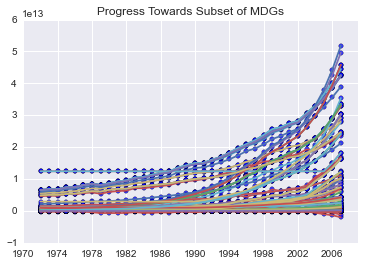

In [71]:
np.random.seed(100)
rand_rows = np.random.choice(indiarows.index.values, size=1240)

def plot_rows(data, ids=None, linestyle="-", legend=True):
    # get some colors for the lines
    bmap = pplt.brewer2mpl.get_map('Set3','Qualitative', 10, True)
    #colors = bmap.mpl_colors
    
    if not None == ids:
        get_rows = lambda: enumerate(ids)
    else:
        get_rows = lambda: enumerate(data.index.values)
    
    for i, r in get_rows():
        # get the time series values
        time_data = data.loc[r]

        # create an x axis to plot along
        just_years = [y[:4] for y in data.columns]
        X = pd.DatetimeIndex(just_years)

        # get time series info for labeling
        country, descrip = india2[["Country Name", "Series Name"]].loc[r]

        # plot the series
        plt.plot(X, time_data, 
                 label="{} - {}".format(country, descrip), ls=linestyle)
        plt.scatter(X, time_data, alpha=0.8)

#     if legend:
#         plt.legend(loc=0)
    plt.title("Progress Towards Subset of MDGs")

plot_rows(indiarows, ids=rand_rows)
plt.show()

In [80]:
india_pred_rows = india2.loc[submission_labels.index]

In [209]:
india_pred_rows = india_pred_rows[india_pred_rows["Country Name"] == "India"]
india_pred_rows

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
115541          0.703         0.7030          0.703         0.7030   
115600          0.000         0.0000          0.000         0.0000   
115735          0.204         0.2002          0.196         0.1915   
116012          0.001         0.0010          0.001         0.0010   

        1976 [YR1976]  1977 [YR1977]  1978 [YR1978]  1979 [YR1979]  \
115541         0.7030         0.7030         0.7030         0.7030   
115600         0.0000         0.0000         0.0000         0.0000   
115735         0.1867         0.1817         0.1764         0.1713   
116012         0.0010         0.0010         0.0010         0.0010   

        1980 [YR1980]  1981 [YR1981]  1982 [YR1982]  1983 [YR1983]  \
115541         0.7030         0.7030         0.7030         0.7030   
115600         0.0000         0.0000         0.0000         0.0000   
115735         0.1663         0.1614         0.1569         0.1526   
116012         0.0010         0.0010         0.0010         0.0010   

        1984 [YR1984]  1985 [YR1985]  1986 [YR1986]  1987 [YR1987]  \
115541         0.7030         0.7030         0.7030         0.7030   
115600         0.0000         0.0000         0.0000         0.0000   
115735         0.1485         0.1445         0.1406         0.1367   
116012         0.0010         0.0010         0.0010         0.0010   

        1988 [YR1988]  1989 [YR1989]  1990 [YR1990]  1991 [YR1991]  \
115541         0.7030         0.7030         0.7030       0.714000   
115600         0.0000         0.0000         0.0000       0.000001   
115735         0.1329         0.1292         0.1256       0.122100   
116012         0.0010         0.0010         0.0010       0.001000   

        1992 [YR1992]  1993 [YR1993]  1994 [YR1994]  1995 [YR1995]  \
115541       0.724000       0.734000       0.745000       0.755000   
115600       0.000001       0.000002       0.000011       0.000262   
115735       0.118700       0.115400       0.112100       0.108800   
116012       0.001000       0.001000       0.001000       0.002000   

        1996 [YR1996]  1997 [YR1997]  1998 [YR1998]  1999 [YR1999]  \
115541       0.765000       0.776000        0.78600       0.796000   
115600       0.000463       0.000708        0.00139       0.002732   
115735       0.105500       0.102000        0.09850       0.095000   
116012       0.002000       0.003000        0.00300       0.004000   

        2000 [YR2000]  2001 [YR2001]  2002 [YR2002]  2003 [YR2003]  \
115541       0.806000       0.816000       0.827000       0.837000   
115600       0.005275       0.006601       0.015379       0.016865   
115735       0.091500       0.088100       0.084700       0.081300   
116012       0.004000       0.004000       0.004000       0.004000   

        2004 [YR2004]  2005 [YR2005]  2006 [YR2006]  2007 [YR2007]  \
115541       0.847000       0.857000       0.867000         0.8770   
115600       0.019761       0.023881       0.028055         0.0395   
115735       0.078200       0.075100       0.072100         0.0693   
116012       0.004000       0.004000       0.004000         0.0030   

       Country Name Series Code  \
115541        India         7.8   
115600        India        8.16   
115735        India         4.1   
116012        India         6.1   

                                              Series Name  
115541                Ensure environmental sustainability  
115600  Develop a global partnership for development: ...  
115735                             Reduce child mortality  
116012                                    Combat HIV/AIDS

In [208]:
# ia = india_pred_rows.index.values
# ia

In [211]:
india_train = india2[~india2.index.isin(india_pred_rows.index.values)]
india_train

1972 [YR1972]  1973 [YR1973]  1974 [YR1974]  1975 [YR1975]  \
114990   1.072211e+01   1.072211e+01   1.072211e+01   1.072211e+01   
114991   3.998927e+01   3.998927e+01   3.998927e+01   3.998927e+01   
114992   2.840343e+01   2.840343e+01   2.840343e+01   2.840343e+01   
114993   3.995493e+00   3.995493e+00   3.995493e+00   3.995493e+00   
114994   1.466854e+01   1.466854e+01   1.466854e+01   1.466854e+01   
114995   1.560154e+01   1.560154e+01   1.560154e+01   1.560154e+01   
114996   6.860000e+01   6.860000e+01   6.860000e+01   6.860000e+01   
114998   7.824938e-01   7.824938e-01   7.824938e-01   7.824938e-01   
114999   6.611141e+01   6.611141e+01   6.611141e+01   6.611141e+01   
115000   8.952264e+01   8.952264e+01   8.952264e+01   8.952264e+01   
115001  -6.697895e-01   2.313600e+00  -1.531138e+00   6.592208e+00   
115002   1.396280e+11   1.428590e+11   1.406710e+11   1.499450e+11   
115003   6.563329e+10   7.828323e+10   9.029951e+10   8.772904e+10   
115004  -2.892019e+00   7.264818e-03  -3.767668e+00   4.154560e+00   
115005   2.404070e+02   2.404245e+02   2.313661e+02   2.409783e+02   
115006   1.130052e+02   1.317471e+02   1.485183e+02   1.409908e+02   
115007   7.396319e+00   7.396319e+00   7.396319e+00   7.396319e+00   
115008   7.389280e+09   7.389280e+09   7.389280e+09   7.389280e+09   
115009   1.046534e+01   1.046534e+01   1.046534e+01   1.046534e+01   
115010   3.374069e+10   3.374069e+10   3.374069e+10   3.374069e+10   
115011   4.436005e-01   4.074197e-01   3.990409e-01   4.852030e-01   
115012   3.208382e+08   3.528321e+08   4.026587e+08   4.847412e+08   
115013   7.216497e+00   6.914325e+00   7.479669e+00   8.051765e+00   
115014   5.219399e+09   5.987917e+09   7.547481e+09   8.044102e+09   
115015   2.410000e+00   2.418340e+00   2.561091e+00   2.209960e+00   
115016   1.743055e+09   2.094322e+09   2.584310e+09   2.207857e+09   
115017   2.103407e-01   2.453361e-01   6.697881e-01   1.119286e+00   
115018   1.521309e+08   2.124651e+08   6.758606e+08   1.118221e+09   
115019   1.785896e+01   1.785896e+01   1.785896e+01   1.785896e+01   
115020   1.366612e-01   1.174164e-01   1.478037e-01   2.041325e-01   
...               ...            ...            ...            ...   
116278   4.100000e+00   4.100000e+00   4.100000e+00   4.100000e+00   
116279   3.700000e+00   3.700000e+00   3.700000e+00   3.700000e+00   
116280   8.900000e+00   8.900000e+00   8.900000e+00   8.900000e+00   
116281   8.000000e+00   8.000000e+00   8.000000e+00   8.000000e+00   
116282   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116283   8.300000e+00   8.300000e+00   8.300000e+00   8.300000e+00   
116284   9.000000e+00   9.000000e+00   9.000000e+00   9.000000e+00   
116285   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116286   1.650000e+01   1.650000e+01   1.650000e+01   1.650000e+01   
116287   1.184179e+08   1.230170e+08   1.277875e+08   1.327346e+08   
116288   2.038880e+01   2.070320e+01   2.101760e+01   2.133200e+01   
116289   3.816655e+00   3.810233e+00   3.804689e+00   3.798258e+00   
116290   0.000000e+00   7.479700e+07   6.085150e+08   8.175230e+08   
116292   8.140000e+00   8.140000e+00   8.140000e+00   8.140000e+00   
116294   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116295   9.110000e+01   9.110000e+01   9.110000e+01   9.110000e+01   
116296   7.980000e+01   7.980000e+01   7.980000e+01   7.980000e+01   
116297   8.310000e+01   8.310000e+01   8.310000e+01   8.310000e+01   
116298   8.200000e+00   8.200000e+00   8.200000e+00   8.200000e+00   
116299   1.500000e+01   1.500000e+01   1.500000e+01   1.500000e+01   
116300   1.780000e+01   1.780000e+01   1.780000e+01   1.780000e+01   
116301   2.600000e+00   2.600000e+00   2.600000e+00   2.600000e+00   
116310   5.020092e-01   5.020092e-01   5.020092e-01   5.020092e-01   
116311   6.458208e+00   7.518547e+00   9.666839e+00   1.004536e+01   
116313   3.030000e+01   3.030000e+01   3.030000e+01   3.030000e+01   
116314   2.040000e

In [ ]:
india_test = 

In [254]:
from sklearn.preprocessing import StandardScaler
normalized_data = StandardScaler().fit_transform(data.astype(float))

NameError: name 'data' is not defined

In [251]:
from pandas.stats.moments import ewma
import numpy as np

pred_period = 10

def predict(x,span,periods = pred_period):     
    x_predict = np.zeros((span+periods))
    x_predict[:span] = x[-span:]
    pred =  ewma(x_predict,span)[span:]

    return pred

In [253]:
predict(ia,5)

ValueError: could not broadcast input array from shape (4) into shape (5)

In [ ]:
#with the null values

In [27]:
indianr = india.loc[india2.index]

In [28]:
indianr = indianr[generate_year_list(1972, 2007)]

P:\Anaconda Python\Anaconda\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


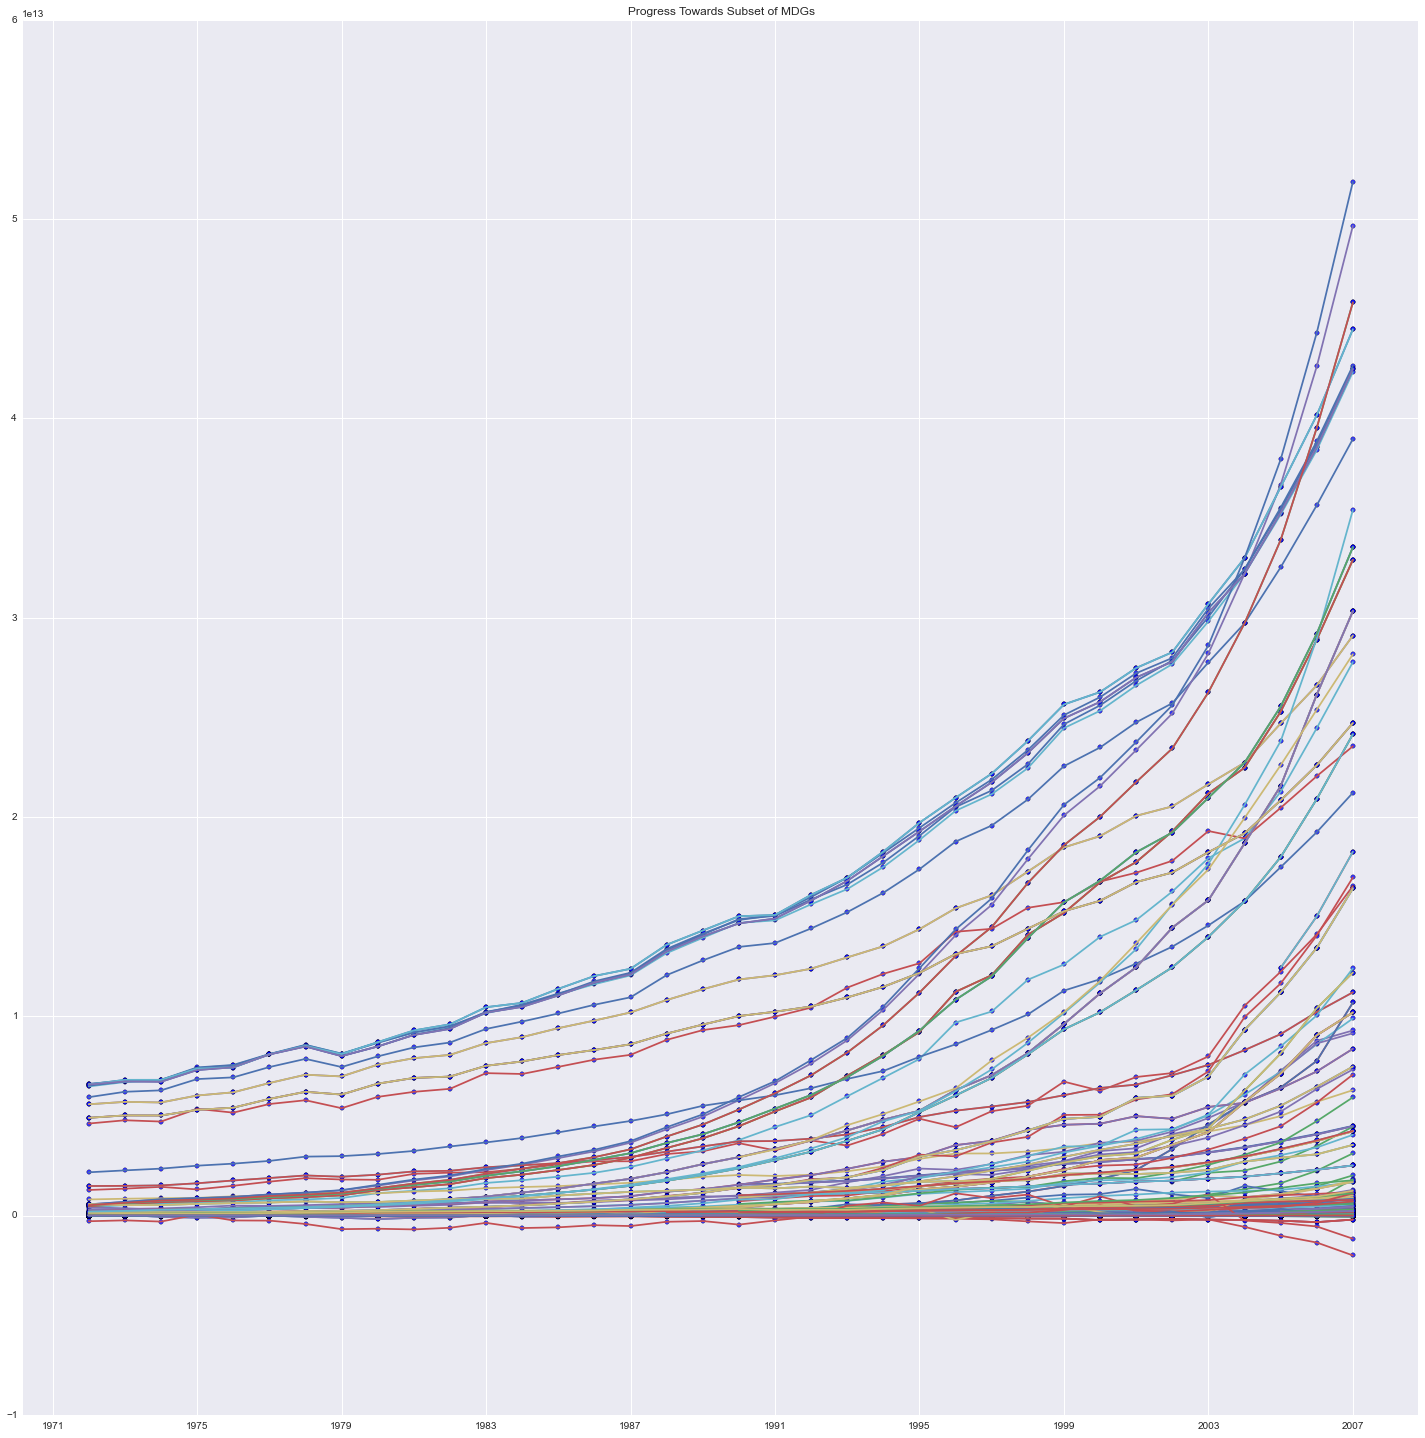

In [236]:
np.random.seed(100)
rand_rows = np.random.choice(indianr.index.values, size=1240)

def plot_rows(data, ids=None, linestyle="-", legend=True):
    # get some colors for the lines
    bmap = pplt.brewer2mpl.get_map('Set3','Qualitative', 10, True)
    #colors = bmap.mpl_colors
    
    if not None == ids:
        get_rows = lambda: enumerate(ids)
    else:
        get_rows = lambda: enumerate(data.index.values)
    
    for i, r in get_rows():
        # get the time series values
        time_data = data.loc[r]

        # create an x axis to plot along
        just_years = [y[:4] for y in data.columns]
        X = pd.DatetimeIndex(just_years)

        # get time series info for labeling
        country, descrip = india[["Country Name", "Series Name"]].loc[r]

        # plot the series
        plt.plot(X, time_data, 
                 label="{} - {}".format(country, descrip), ls=linestyle)
        plt.scatter(X, time_data, alpha=0.8)

#     if legend:
#         plt.legend(loc=0)
    plt.title("Progress Towards Subset of MDGs")

plot_rows(indianr, ids=rand_rows)
plt.show()

In [29]:
indianr_pr = training_data.loc[submission_labels.index]

In [237]:
from pandas.tools.plotting import scatter_matrix


In [244]:
np.corrcoef(indiar,indiar)

array([[  1.00000000e+00,              nan,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,  -1.22296170e-15],
       [             nan,              nan,              nan, ...,
                     nan,              nan,              nan],
       [  1.00000000e+00,              nan,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,  -1.56378710e-15],
       ..., 
       [  1.00000000e+00,              nan,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,  -1.56378710e-15],
       [  1.00000000e+00,              nan,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,  -1.56980166e-15],
       [ -1.22296170e-15,              nan,  -1.56378710e-15, ...,
         -1.56378710e-15,  -1.56980166e-15,   1.00000000e+00]])

In [245]:
np.corrcoef(indiar)

array([[  1.00000000e+00,              nan,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,  -1.17284032e-15],
       [             nan,              nan,              nan, ...,
                     nan,              nan,              nan],
       [  1.00000000e+00,              nan,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,  -1.29313164e-15],
       ..., 
       [  1.00000000e+00,              nan,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,  -1.29313164e-15],
       [  1.00000000e+00,              nan,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,  -1.56980166e-15],
       [ -1.22296170e-15,              nan,  -1.56378710e-15, ...,
         -1.56378710e-15,  -1.56980166e-15,   1.00000000e+00]])